In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("salary_data.csv")

In [3]:
X = data["YearsExperience"].values
y = data["Salary"].values

In [4]:
X_norm = (X - np.mean(X)) / np.std(X)

In [5]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
epochs_list = [200, 500, 1000]

best_lr = None
best_epochs = None
best_r2 = -999

# R² function
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [6]:
def train_model(lr, epochs):
    m = 0   # slope
    c = 0   # intercept
    n = len(X_norm)

    for epoch in range(epochs):
        y_pred = m * X_norm + c
        dm = (-2/n) * sum(X_norm * (y - y_pred))
        dc = (-2/n) * sum(y - y_pred)

        m -= lr * dm
        c -= lr * dc

    y_pred_final = m * X_norm + c
    return m, c, r2_score(y, y_pred_final)

In [8]:
for lr in learning_rates:
    for ep in epochs_list:
        _, _, score = train_model(lr, ep)
        if score > best_r2:
            best_lr = lr
            best_epochs = ep
            best_r2 = score

print(f"\n Best Learning Rate: {best_lr}")
print(f" Best Epochs: {best_epochs}")
print(f" Best R² Score: {best_r2:.4f}\n")

# Train best model again to plot learning process
m = 0
c = 0
n = len(X_norm)


 Best Learning Rate: 0.01
 Best Epochs: 1000
 Best R² Score: 0.9570



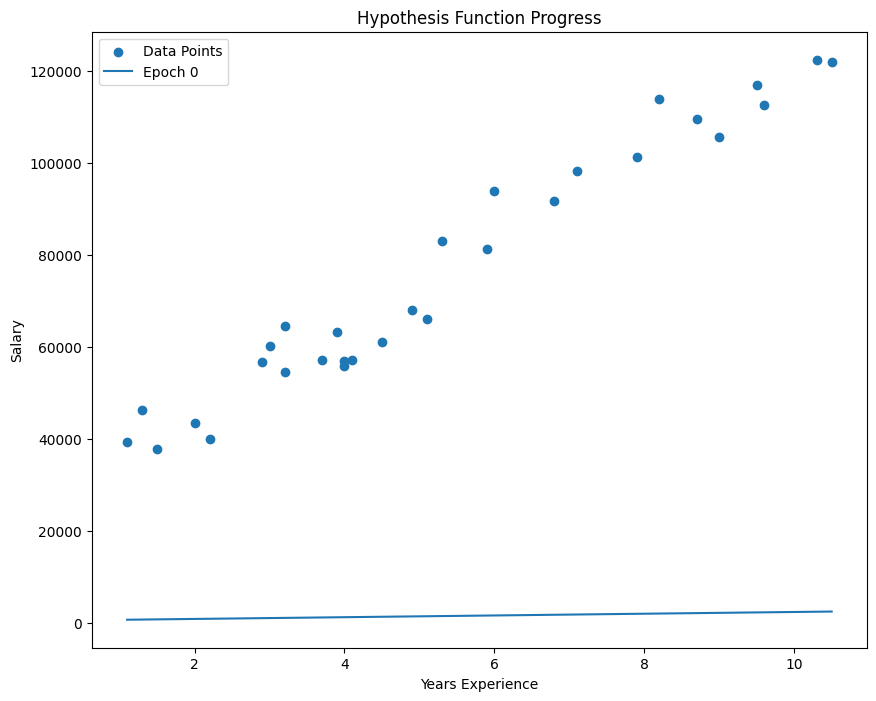

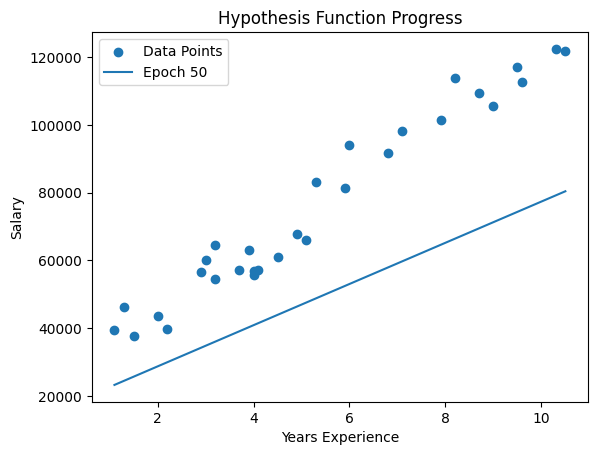

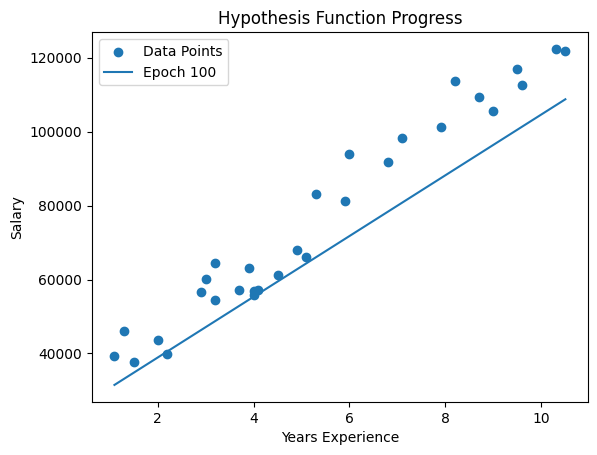

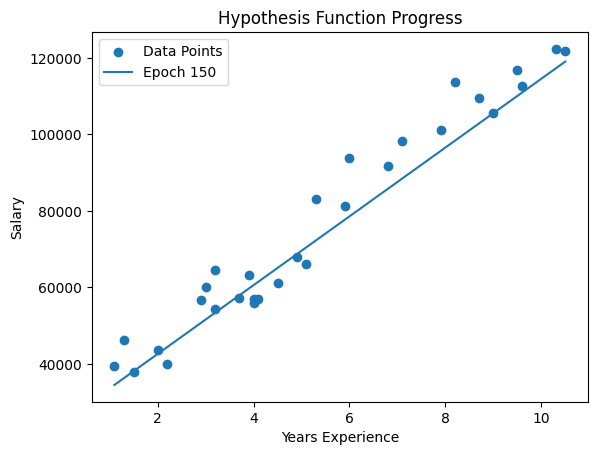

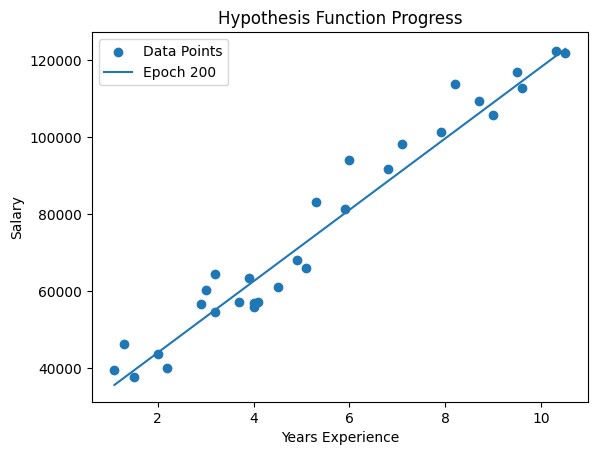

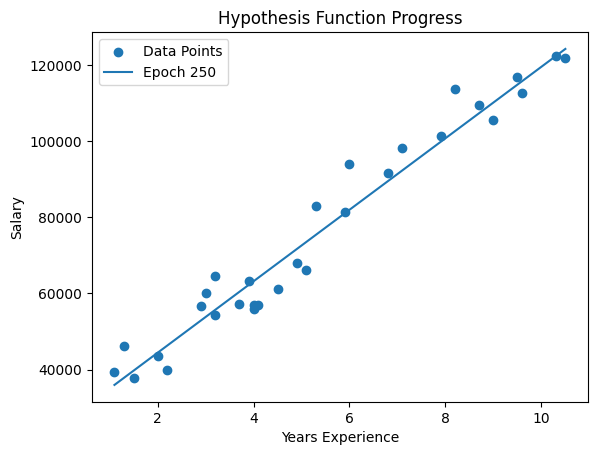

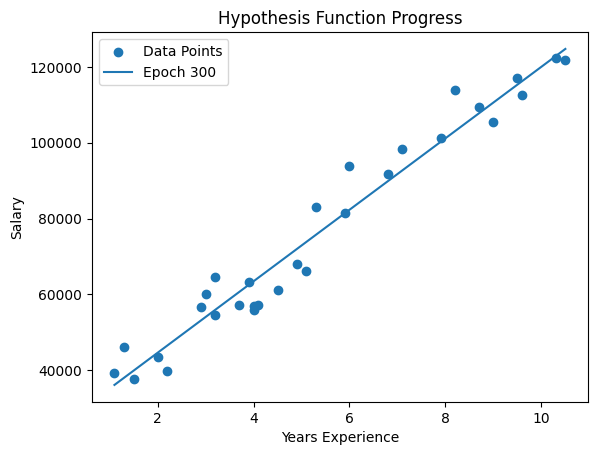

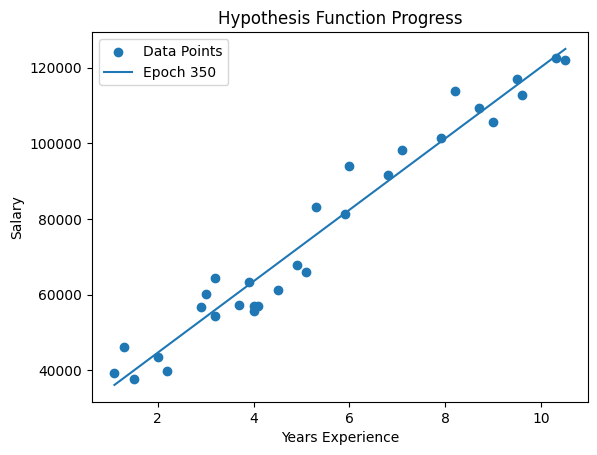

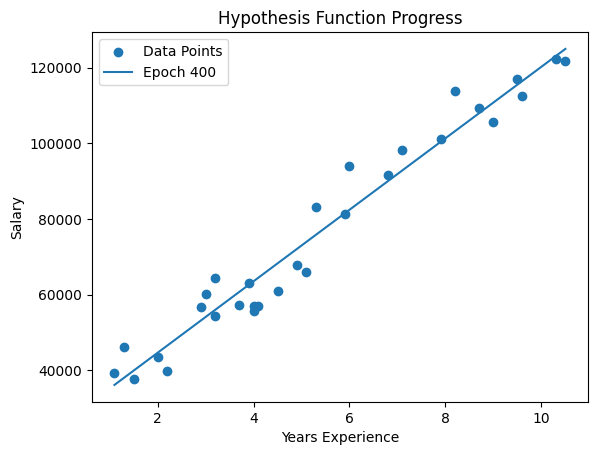

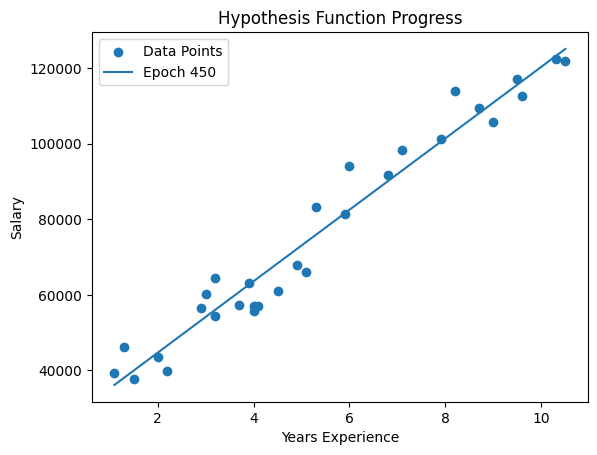

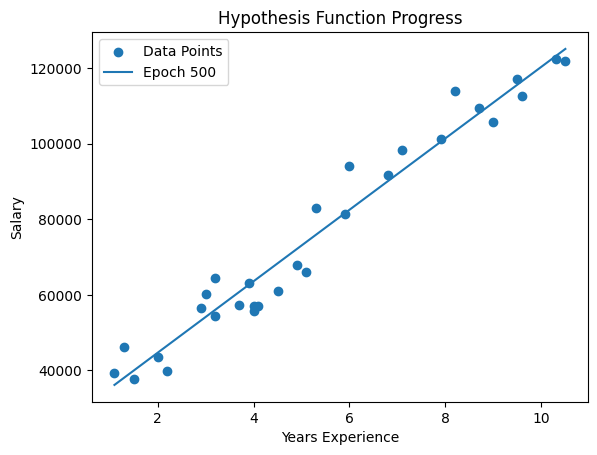

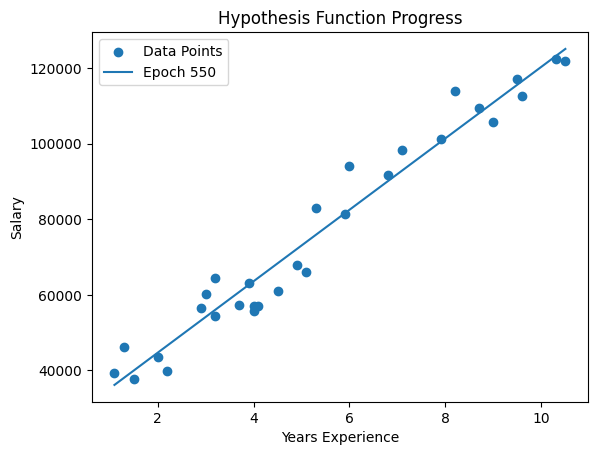

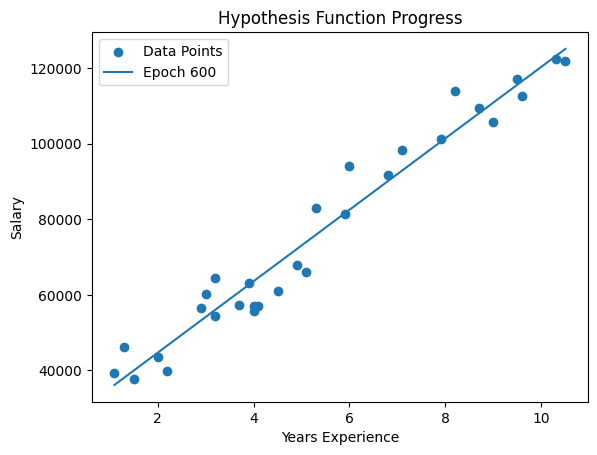

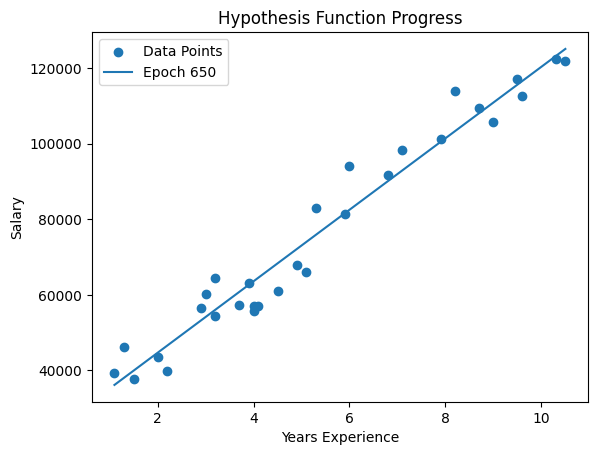

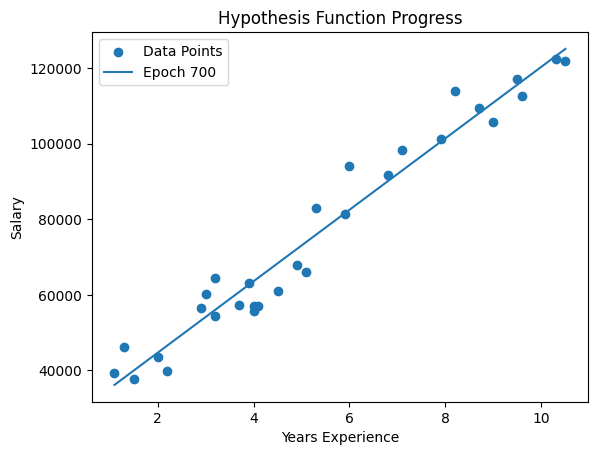

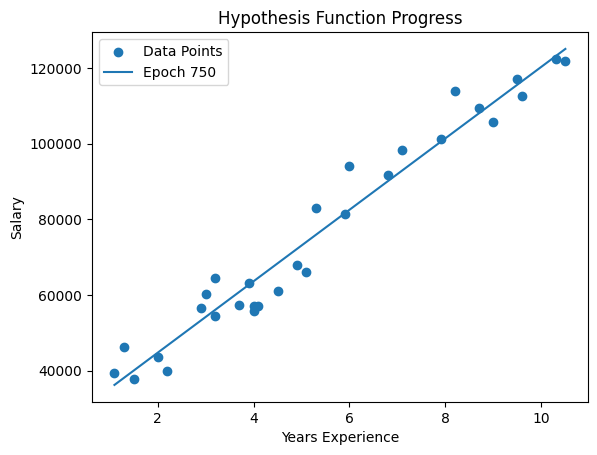

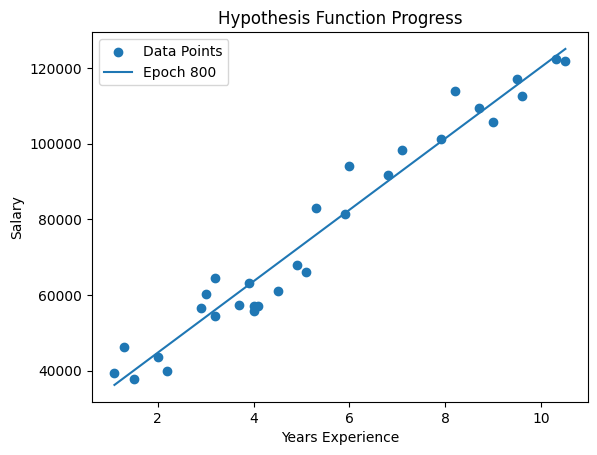

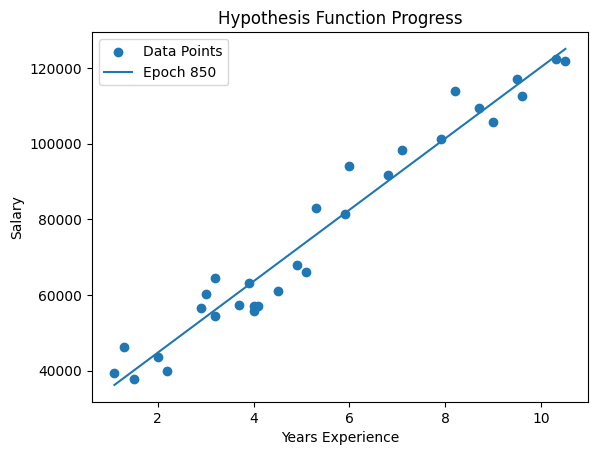

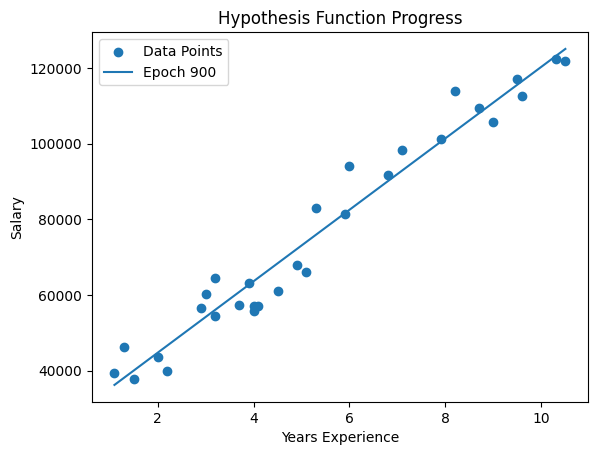

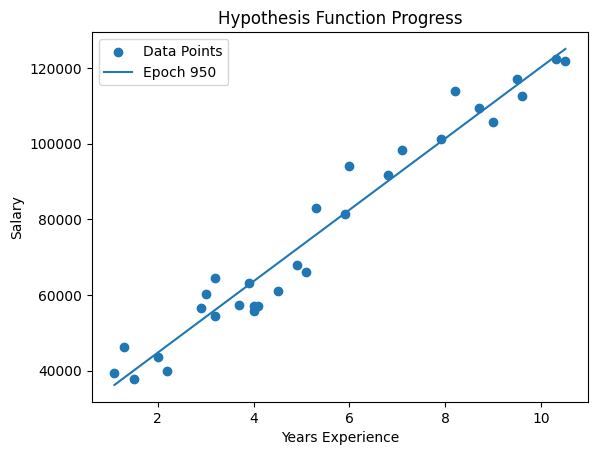

In [9]:
plt.figure(figsize=(10, 8))

for epoch in range(best_epochs):
    y_pred = m * X_norm + c

    # Gradient Descent Update
    dm = (-2/n) * sum(X_norm * (y - y_pred))
    dc = (-2/n) * sum(y - y_pred)
    m -= best_lr * dm
    c -= best_lr * dc

    # Plot every 50 epochs
    if epoch % 50 == 0:
        plt.scatter(X, y, label="Data Points")
        plt.plot(X, (m * X_norm + c), label=f"Epoch {epoch}")
        plt.xlabel("Years Experience")
        plt.ylabel("Salary")
        plt.title("Hypothesis Function Progress")
        plt.legend()
        plt.show()

In [10]:
y_pred_final = m * X_norm + c

In [11]:
final_r2 = r2_score(y, y_pred_final)

In [12]:
print(" Final Model Results")
print(f"Slope (m): {m:.4f}")
print(f"Intercept (c): {c:.4f}")
print(f"Final R² Score: {final_r2:.4f}")

 Final Model Results
Slope (m): 26367.1824
Intercept (c): 76002.9999
Final R² Score: 0.9570


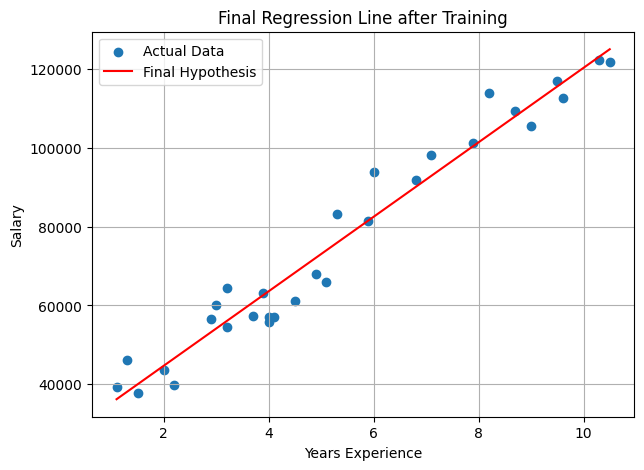

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred_final, color='red', label="Final Hypothesis")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Final Regression Line after Training")
plt.legend()
plt.grid(True)
plt.show()